In [78]:
import pandas as pd
import numpy as np 

from sklearn.linear_model import LinearRegression 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [79]:
traindf = pd.read_csv('train.csv')
testdf = pd.read_csv('test.csv')

In [80]:
traindf.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [81]:
traindf.duplicated().value_counts()

False    1460
dtype: int64

In [82]:
traindf.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [83]:
traindf.LotArea.describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

In [84]:
traindf.GrLivArea.describe()

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64

In [85]:
E1DF = traindf[['GrLivArea', 'LotArea', 'MSSubClass', 'SalePrice','1stFlrSF','GarageArea']]

<AxesSubplot:>

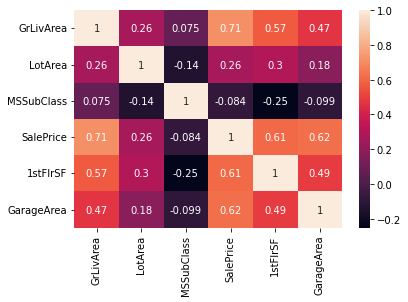

In [86]:
corr = E1DF.corr() 
sns.heatmap(corr, annot=True) 

In [87]:
E1DF.isna().sum()

GrLivArea     0
LotArea       0
MSSubClass    0
SalePrice     0
1stFlrSF      0
GarageArea    0
dtype: int64

In [88]:
Lin_reg = linear_model.LinearRegression()

In [89]:
X = E1DF[['GarageArea', '1stFlrSF', 'LotArea', 'GrLivArea' ]]

In [90]:
y = np.log(E1DF['SalePrice'])

In [91]:
E1DF = E1DF.apply(lambda x: x.fillna(x.mean()),axis=0)

In [92]:
x.isna().sum()

MasVnrArea     0
TotalBsmtSF    0
1stFlrSF       0
GrLivArea      0
OpenPorchSF    0
dtype: int64

In [93]:
Lin_reg.fit(X,y)

LinearRegression()

In [94]:
x_test = testdf[['GarageArea', '1stFlrSF', 'LotArea', 'GrLivArea']]

In [95]:
x_test.isna().sum()

GarageArea    1
1stFlrSF      0
LotArea       0
GrLivArea     0
dtype: int64

In [96]:
x_test= x_test.apply(lambda x: x.fillna(x.mean()),axis=0)

In [97]:
x_test.isna().sum()

GarageArea    0
1stFlrSF      0
LotArea       0
GrLivArea     0
dtype: int64

In [98]:
y_pred = Lin_reg.predict(x_test)

In [99]:
y_pred_df = pd.DataFrame()

In [100]:
y_pred_df['Id'] = testdf['Id']

In [101]:
y_pred_df['SalePrice'] = np.exp(y_pred)

In [102]:
y_pred_df.head()

,Id,SalePrice
0,1461,155030.999122
1,1462,145469.377004
2,1463,167717.013111
3,1464,164223.021642
4,1465,160155.554522


In [103]:
y_pred_df.to_csv('y_pred.csv', index = False)

In [104]:
print('Coefficients:',Lin_reg.coef_)
print('Intercept:', Lin_reg.intercept_)

Coefficients: [6.77063225e-04 1.74243423e-04 1.15450437e-06 3.25292997e-04]
Intercept: 10.996121934304957


In [105]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 438)

In [106]:
y_pred = Lin_reg.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)

MSE:  0.07343175261192392


In [107]:
root = np.sqrt(mse)
print("RMSE: ", root)

RMSE:  0.27098293786126815


Experiment 1 ^^

In [108]:
E2DF = traindf[['MasVnrArea','TotalBsmtSF', '1stFlrSF',  'GrLivArea',  'SalePrice','OpenPorchSF' ]]

In [109]:
E2DF.isna().sum()

MasVnrArea     8
TotalBsmtSF    0
1stFlrSF       0
GrLivArea      0
SalePrice      0
OpenPorchSF    0
dtype: int64

In [110]:
E2DF = E2DF.apply(lambda x: x.fillna(x.mean()),axis=0)

<AxesSubplot:>

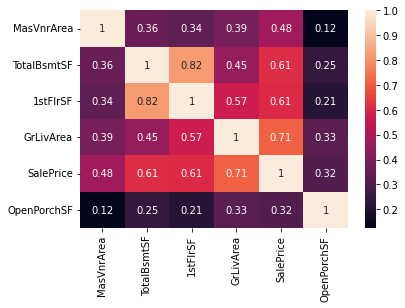

In [111]:
corr = E2DF.corr() 
sns.heatmap(corr, annot=True) 

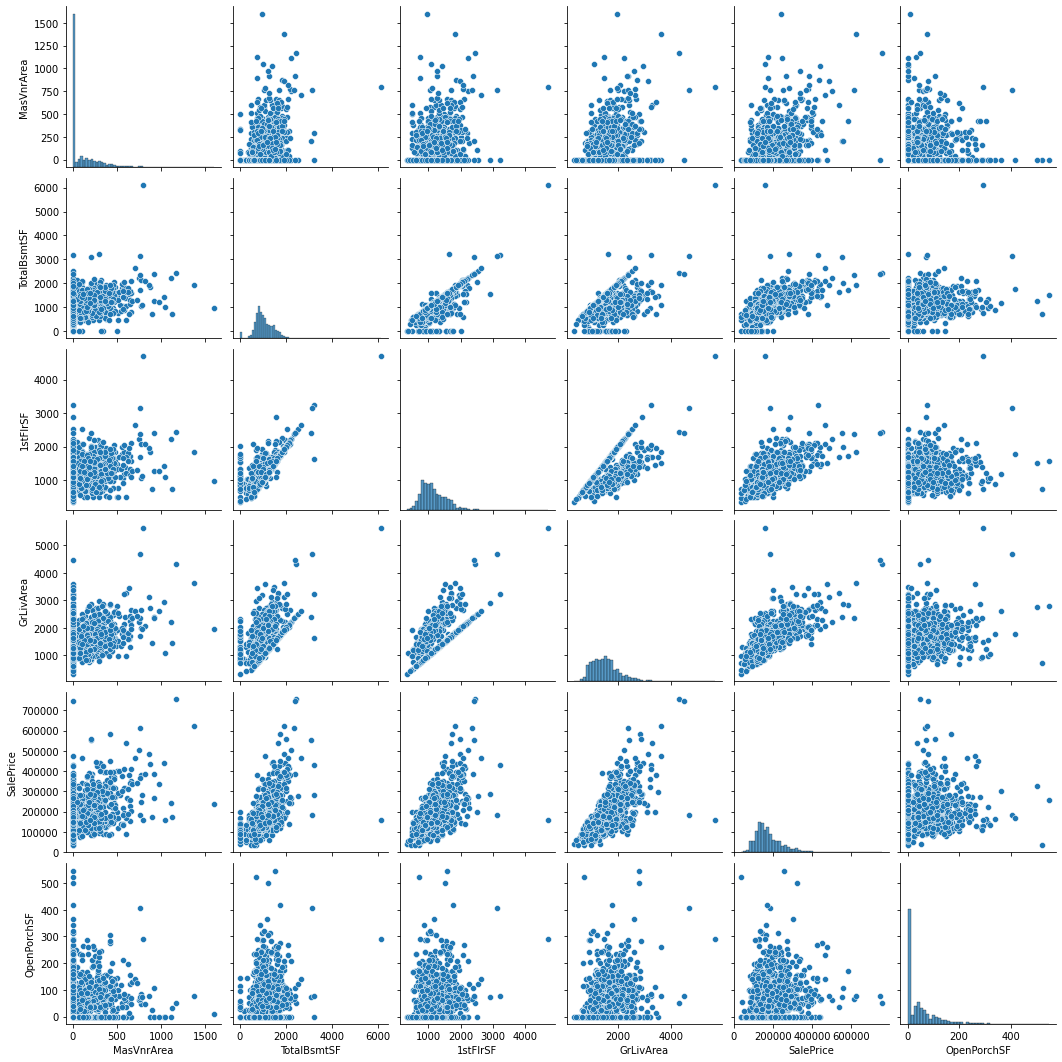

In [112]:
sns.pairplot(E2DF)
plt.savefig('quant_pair_plot.png', bbox_inches = 'tight')

In [113]:
Lin_reg2 = linear_model.LinearRegression()

In [114]:
x = E2DF[['MasVnrArea','TotalBsmtSF', '1stFlrSF',  'GrLivArea','OpenPorchSF']]

In [115]:
y = np.log(E2DF['SalePrice'])

In [116]:
E2DF = E2DF.apply(lambda x: x.fillna(x.mean()),axis=0)

In [117]:
x.isna().sum()

MasVnrArea     0
TotalBsmtSF    0
1stFlrSF       0
GrLivArea      0
OpenPorchSF    0
dtype: int64

In [118]:
x = x.apply(lambda x: x.fillna(x.mean()),axis=0)

In [119]:
Lin_reg2.fit(x,y)

LinearRegression()

In [120]:
x_test2 = testdf[['MasVnrArea','TotalBsmtSF', '1stFlrSF',  'GrLivArea','OpenPorchSF']]

In [121]:
x_test2.isna().sum()

MasVnrArea     15
TotalBsmtSF     1
1stFlrSF        0
GrLivArea       0
OpenPorchSF     0
dtype: int64

In [122]:
x_test2 = x_test2.apply(lambda x: x.fillna(x.mean()),axis=0)

In [123]:
x_test2.isna().sum()

MasVnrArea     0
TotalBsmtSF    0
1stFlrSF       0
GrLivArea      0
OpenPorchSF    0
dtype: int64

In [124]:
y_pred2 = Lin_reg2.predict(x_test2)

In [125]:
y_pred_df2 = pd.DataFrame()

In [126]:
y_pred_df2['Id'] = testdf['Id']

In [127]:
y_pred_df2['SalePrice'] = np.exp(y_pred2)

In [128]:
y_pred_df2.head()

,Id,SalePrice
0,1461,120550.370673
1,1462,168576.862922
2,1463,162469.979158
3,1464,161793.085407
4,1465,161687.994745


In [160]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state = 438)

In [161]:
y_pred2 = Lin_reg2.predict(x_test2)
mse2 = mean_squared_error(y_test, y_pred2)
print("MSE: ", mse2)

ValueError: Found input variables with inconsistent numbers of samples: [438, 1459]

In [131]:
root2 = np.sqrt(mse2)
print("RMSE: ", root2)

RMSE:  0.27098293786126815


In [132]:
y_pred_df2.to_csv('y_pred2.csv', index = False)

Expirement 2 ^^^^

In [133]:
E3DF = traindf[['LotFrontage', 'BsmtFinSF1' , 'SalePrice', '2ndFlrSF']]

<AxesSubplot:>

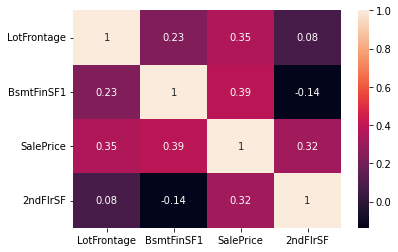

In [134]:
corr = E3DF.corr() # allows us to get the correlations
sns.heatmap(corr, annot=True)

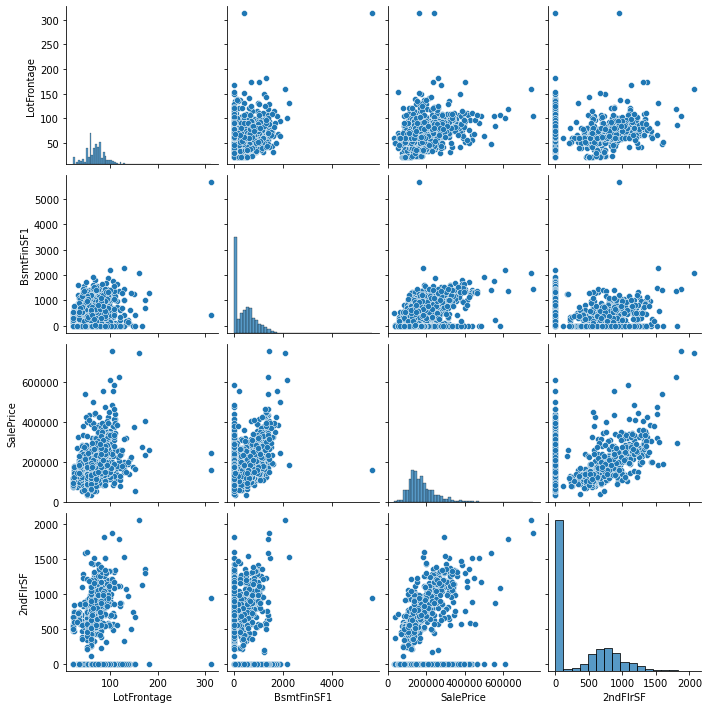

In [135]:
sns.pairplot(E3DF)
plt.savefig('quant_pair_plot.png', bbox_inches = 'tight')

In [136]:
E3DF.isna().sum()

LotFrontage    259
BsmtFinSF1       0
SalePrice        0
2ndFlrSF         0
dtype: int64

In [137]:
E3DF = E3DF.apply(lambda x: x.fillna(x.mean()),axis=0)

In [138]:
E3DF.isna().sum()


LotFrontage    0
BsmtFinSF1     0
SalePrice      0
2ndFlrSF       0
dtype: int64

In [139]:
Lin_reg3 = linear_model.LinearRegression()

In [140]:
x = E3DF[['LotFrontage', 'BsmtFinSF1', '2ndFlrSF']]

In [141]:

y = np.log(E3DF['SalePrice'])

In [142]:
Lin_reg3.fit(x,y)

LinearRegression()

In [143]:
x_test3 = testdf[['LotFrontage', 'BsmtFinSF1', '2ndFlrSF']]

In [144]:
x_test3.isna().sum()

LotFrontage    227
BsmtFinSF1       1
2ndFlrSF         0
dtype: int64

In [145]:
x_test3 = x_test3.apply(lambda x: x.fillna(x.mean()),axis=0)

In [146]:
x_test3.isna().sum()

LotFrontage    0
BsmtFinSF1     0
2ndFlrSF       0
dtype: int64

In [147]:
y_pred3 = Lin_reg3.predict(x_test3)

In [148]:
y_pred_df3 = pd.DataFrame()

In [149]:
y_pred_df3['Id'] = testdf['Id']

In [150]:
y_pred_df3['SalePrice'] = np.exp(y_pred3)

In [151]:
y_pred_df3.head()

,Id,SalePrice
0,1461,156584.056133
1,1462,182271.911950
2,1463,212740.270329
3,1464,201945.060223
4,1465,125503.465482


In [152]:
y_pred_df3.to_csv('y_pred3.csv', index = False)

In [153]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state = 438)

In [154]:
y_pred3= Lin_reg3.predict(x_test3)
mse3 = mean_squared_error(y_test, y_pred)
print("MSE: ", mse3)

MSE:  0.07343175261192392


In [155]:
root3 = np.sqrt(mse3)
print("RMSE: ", root3)

RMSE:  0.27098293786126815
